# Secção 1 - Descrição e caracterização dos dados do dataset

In [65]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## Data

In [2]:
data_glioma = pd.read_csv("data_RNA_Seq_v2_expression_median.txt", sep='\t', index_col = 0)

In [3]:
data_glioma.head()

,Entrez_Gene_Id,TCGA-CS-4938-01,TCGA-CS-4941-01,TCGA-CS-4942-01,TCGA-CS-4943-01,TCGA-CS-4944-01,TCGA-CS-5390-01,TCGA-CS-5393-01,TCGA-CS-5394-01,TCGA-CS-5395-01,...,TCGA-VW-A8FI-01,TCGA-W9-A837-01,TCGA-WH-A86K-01,TCGA-WY-A858-01,TCGA-WY-A859-01,TCGA-WY-A85A-01,TCGA-WY-A85B-01,TCGA-WY-A85C-01,TCGA-WY-A85D-01,TCGA-WY-A85E-01
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
LOC100130426,100130426,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
UBE2Q2P3,100133144,8.7141,36.4493,11.8131,8.6116,0.0000,5.3382,3.7845,8.3071,2.7732,...,19.1299,12.5770,10.9796,7.8225,3.3371,5.4526,8.2616,11.5121,5.3895,9.9433
UBE2Q2P3,100134869,22.7523,21.1767,11.0242,5.0835,30.2610,27.8886,8.7230,15.4466,12.7776,...,21.9905,27.0125,14.2608,16.6975,10.2310,16.1890,19.7074,18.7291,8.9103,7.4480
LOC149767,10357,268.5756,156.6874,185.1384,269.8363,216.3409,159.7590,198.1884,208.5413,255.2882,...,127.7473,106.8292,205.5168,184.4077,125.5468,124.9195,133.7392,120.9236,107.2535,143.0057
TIMM23,10431,845.8150,390.2692,621.4533,835.7286,812.5079,576.9055,551.9467,607.8956,386.1776,...,564.3623,603.3724,570.9135,760.7155,875.1413,658.2212,662.6506,524.7242,705.1282,748.5822


In [4]:
# Tamanho da amostra

# Delete da coluna Entrez_Gene_ID pois o que se quer considerar são a quantidade de genes e de amostras
del data_glioma["Entrez_Gene_Id"]

data_glioma.shape

(20531, 530)

Tem-se 20531 genes (catalogados por "Hugo_Symbol") e 530 amostras (pacientes).

In [5]:
#Tipos de dados
print ([data_glioma.iloc[:,i].dtype for i in range(data_glioma.shape[1])])

[dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('fl

In [6]:
# Certificar que não existem genes repetidos

hugo_data_glioma = data_glioma.reset_index()
hugo_data_glioma.drop_duplicates(subset=['Hugo_Symbol'],keep=False)

new_data_glioma = hugo_data_glioma.set_index('Hugo_Symbol')
new_data_glioma.head()

,TCGA-CS-4938-01,TCGA-CS-4941-01,TCGA-CS-4942-01,TCGA-CS-4943-01,TCGA-CS-4944-01,TCGA-CS-5390-01,TCGA-CS-5393-01,TCGA-CS-5394-01,TCGA-CS-5395-01,TCGA-CS-5396-01,...,TCGA-VW-A8FI-01,TCGA-W9-A837-01,TCGA-WH-A86K-01,TCGA-WY-A858-01,TCGA-WY-A859-01,TCGA-WY-A85A-01,TCGA-WY-A85B-01,TCGA-WY-A85C-01,TCGA-WY-A85D-01,TCGA-WY-A85E-01
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
LOC100130426,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
UBE2Q2P3,8.7141,36.4493,11.8131,8.6116,0.0000,5.3382,3.7845,8.3071,2.7732,8.2828,...,19.1299,12.5770,10.9796,7.8225,3.3371,5.4526,8.2616,11.5121,5.3895,9.9433
UBE2Q2P3,22.7523,21.1767,11.0242,5.0835,30.2610,27.8886,8.7230,15.4466,12.7776,19.9402,...,21.9905,27.0125,14.2608,16.6975,10.2310,16.1890,19.7074,18.7291,8.9103,7.4480
LOC149767,268.5756,156.6874,185.1384,269.8363,216.3409,159.7590,198.1884,208.5413,255.2882,129.7185,...,127.7473,106.8292,205.5168,184.4077,125.5468,124.9195,133.7392,120.9236,107.2535,143.0057
TIMM23,845.8150,390.2692,621.4533,835.7286,812.5079,576.9055,551.9467,607.8956,386.1776,645.7550,...,564.3623,603.3724,570.9135,760.7155,875.1413,658.2212,662.6506,524.7242,705.1282,748.5822


In [7]:
# Verificar se existem valores em falta
print(new_data_glioma.isnull().sum().sum()) #total
print(new_data_glioma.isnull().sum())       #para cada amostra

0
TCGA-CS-4938-01    0
TCGA-CS-4941-01    0
TCGA-CS-4942-01    0
TCGA-CS-4943-01    0
TCGA-CS-4944-01    0
                  ..
TCGA-WY-A85A-01    0
TCGA-WY-A85B-01    0
TCGA-WY-A85C-01    0
TCGA-WY-A85D-01    0
TCGA-WY-A85E-01    0
Length: 530, dtype: int64


## Metadata 

In [8]:
patient_data = pd.read_csv("data_bcr_clinical_data_patient.txt", sep='\t', index_col = 1)
sample_data  = pd.read_csv("data_bcr_clinical_data_sample.txt", sep='\t', index_col = 1) 

In [9]:
# Informação a retirar do ficheito patiente_data
patient_data.columns = patient_data.iloc[3].values    
patient_data         = patient_data.iloc[4:]

patient_data.head()

,OTHER_PATIENT_ID,FORM_COMPLETION_DATE,HISTOLOGICAL_DIAGNOSIS,GRADE,LATERALITY,TUMOR_SITE,SUPRATENTORIAL_LOCALIZATION,PROSPECTIVE_COLLECTION,RETROSPECTIVE_COLLECTION,SEX,...,ICD_O_3_SITE,INFORMED_CONSENT_VERIFIED,PROJECT_CODE,TARGETED_MOLECULAR_THERAPY,TISSUE_SOURCE_SITE,SITE_OF_TUMOR_TISSUE,OS_STATUS,OS_MONTHS,DFS_STATUS,DFS_MONTHS
Patient Identifier,,,,,,,,,,,,,,,,,,,,,
TCGA-CS-4938,334f715e-08dc-4a29-b8e4-b010b829c478,2/15/12,Astrocytoma,G2,Right,"Supratentorial, Frontal Lobe",Cerebral Cortex,NO,YES,Female,...,C71.9,YES,[Not Available],[Not Available],CS,Central nervous system,LIVING,117.41,DiseaseFree,117.41
TCGA-CS-4941,fc222f23-b3b2-4ac0-bc61-e8e8fa5cc160,4/5/11,Astrocytoma,G3,Right,"Supratentorial, Frontal Lobe",Cerebral Cortex,NO,YES,Male,...,C71.9,YES,[Not Available],[Not Available],CS,Central nervous system,DECEASED,7.69,Recurred/Progressed,0.3
TCGA-CS-4942,230f5fa7-aa36-41ea-b40b-08f520767bd5,3/15/11,Astrocytoma,G3,Right,"Supratentorial, Frontal Lobe",White Matter,NO,YES,Female,...,C71.9,YES,[Not Available],[Not Available],CS,Central nervous system,DECEASED,43.86,Recurred/Progressed,38.9
TCGA-CS-4943,952dfd5d-e65a-4307-b6a9-2ed2b0d2d9ce,3/16/11,Astrocytoma,G3,Left,"Supratentorial, Frontal Lobe",Cerebral Cortex,NO,YES,Male,...,C71.9,YES,[Not Available],[Not Available],CS,Central nervous system,DECEASED,36.33,[Not Available],[Not Available]
TCGA-CS-4944,64cd17eb-c778-45e9-b994-02b68182e51b,4/6/11,Astrocytoma,G2,Right,"Supratentorial, Temporal Lobe",Cerebral Cortex,NO,YES,Male,...,C71.9,YES,[Not Available],[Not Available],CS,Central nervous system,LIVING,60.05,DiseaseFree,60.05


In [10]:
patient_data.describe()

,OTHER_PATIENT_ID,FORM_COMPLETION_DATE,HISTOLOGICAL_DIAGNOSIS,GRADE,LATERALITY,TUMOR_SITE,SUPRATENTORIAL_LOCALIZATION,PROSPECTIVE_COLLECTION,RETROSPECTIVE_COLLECTION,SEX,...,ICD_O_3_SITE,INFORMED_CONSENT_VERIFIED,PROJECT_CODE,TARGETED_MOLECULAR_THERAPY,TISSUE_SOURCE_SITE,SITE_OF_TUMOR_TISSUE,OS_STATUS,OS_MONTHS,DFS_STATUS,DFS_MONTHS
count,515,515,515,515,515,515,515,515,515,515,...,515,515,515,515,515,515,515,515,515,515
unique,515,171,3,3,4,8,5,3,3,2,...,6,1,1,3,26,1,2,434,3,404
top,334f715e-08dc-4a29-b8e4-b010b829c478,11/13/14,Astrocytoma,G3,Right,"Supratentorial, Frontal Lobe",Not listed in Medical Record,NO,YES,Male,...,C71.0,YES,[Not Available],[Not Available],HT,Central nervous system,LIVING,0.1,DiseaseFree,[Not Available]
freq,1,14,194,265,253,302,222,331,330,285,...,439,515,515,251,104,515,389,9,313,37


In [11]:
# Tamanho da amostra
patient_data.shape

(515, 67)

In [12]:
# Valores em falta
print (patient_data[patient_data =='[Not Available]'].count().sum())   # Total
print (patient_data[patient_data =='[Not Available]'].count())         # Para cada variável em estudo

9148
OTHER_PATIENT_ID           0
FORM_COMPLETION_DATE       0
HISTOLOGICAL_DIAGNOSIS     0
GRADE                      0
LATERALITY                 5
                          ..
SITE_OF_TUMOR_TISSUE       0
OS_STATUS                  0
OS_MONTHS                  1
DFS_STATUS                37
DFS_MONTHS                37
Length: 67, dtype: int64


In [13]:
# Informação a retirar do ficheito sample_data
sample_data.columns  = sample_data.iloc[3].values
sample_data          = sample_data.iloc[4:]

sample_data.head()

,PATIENT_ID,OTHER_SAMPLE_ID,SPECIMEN_CURRENT_WEIGHT,DAYS_TO_COLLECTION,DAYS_TO_SPECIMEN_COLLECTION,SPECIMEN_FREEZING_METHOD,SAMPLE_INITIAL_WEIGHT,SPECIMEN_SECOND_LONGEST_DIMENSION,IS_FFPE,LONGEST_DIMENSION,...,PATHOLOGY_REPORT_UUID,SAMPLE_TYPE,SAMPLE_TYPE_ID,SHORTEST_DIMENSION,TIME_BETWEEN_CLAMPING_AND_FREEZING,TIME_BETWEEN_EXCISION_AND_FREEZING,VIAL_NUMBER,ONCOTREE_CODE,CANCER_TYPE,CANCER_TYPE_DETAILED
Sample Identifier,,,,,,,,,,,,,,,,,,,,,
TCGA-CS-6290-01,TCGA-CS-6290,6148f31e-cdba-481b-bcd7-b3aee05925b1,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],0.4,NO,0.4,...,4d5bdf18-7799-463d-a33a-beb8322b0621,Primary,1,0.4,[Not Available],[Not Available],A,AASTR,Glioma,Anaplastic Astrocytoma
TCGA-DU-5847-01,TCGA-DU-5847,c68fc12c-c538-4a89-9f6e-c0800a5a6b53,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],0.8,NO,1,...,d9f2d994-5d17-46c6-a6c9-0f25703ffb22,Primary,1,0.4,[Not Available],[Not Available],A,AASTR,Glioma,Anaplastic Astrocytoma
TCGA-DU-5849-01,TCGA-DU-5849,9e0e239f-ced4-4cf3-bf3c-5ec8224d760b,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],0.9,NO,0.9,...,7ec64754-8800-44dd-a5cc-2a9e8fc8bb27,Primary,1,0.4,[Not Available],[Not Available],A,ODG,Glioma,Oligodendroglioma
TCGA-DU-5852-01,TCGA-DU-5852,101aaa90-fe0a-42b7-bcc7-4f44e29883ec,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],0.9,NO,1,...,a6c1f30a-8350-4fbc-9af2-5333cbe273e6,Primary,1,0.9,[Not Available],[Not Available],A,OAST,Glioma,Oligoastrocytoma
TCGA-DU-5854-01,TCGA-DU-5854,d5baa53a-958c-4163-a388-d3c957c891f9,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],0.9,NO,1,...,e057679f-9741-4a4e-bb60-e03879b1c723,Primary,1,0.7,[Not Available],[Not Available],A,AASTR,Glioma,Anaplastic Astrocytoma


In [14]:
sample_data.describe()

,PATIENT_ID,OTHER_SAMPLE_ID,SPECIMEN_CURRENT_WEIGHT,DAYS_TO_COLLECTION,DAYS_TO_SPECIMEN_COLLECTION,SPECIMEN_FREEZING_METHOD,SAMPLE_INITIAL_WEIGHT,SPECIMEN_SECOND_LONGEST_DIMENSION,IS_FFPE,LONGEST_DIMENSION,...,PATHOLOGY_REPORT_UUID,SAMPLE_TYPE,SAMPLE_TYPE_ID,SHORTEST_DIMENSION,TIME_BETWEEN_CLAMPING_AND_FREEZING,TIME_BETWEEN_EXCISION_AND_FREEZING,VIAL_NUMBER,ONCOTREE_CODE,CANCER_TYPE,CANCER_TYPE_DETAILED
count,530,530,530,530,530,530,530,530,530,530,...,530,530,530,530,530,530,530,530,530,530
unique,516,530,1,267,1,1,61,16,1,29,...,525,2,2,11,1,1,2,6,1,6
top,TCGA-FG-A4MT,6148f31e-cdba-481b-bcd7-b3aee05925b1,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],NO,[Not Available],...,54C5D9F8-8737-49DA-81CF-F9A95B0DB456,Primary,1,[Not Available],[Not Available],[Not Available],A,OAST,Glioma,Oligoastrocytoma
freq,2,1,530,223,530,530,223,308,530,308,...,2,516,516,308,530,530,519,134,530,134


In [15]:
# Tamanho da amostra
sample_data.shape

(530, 24)

In [16]:
# Valores em falta
print ('Total:', sample_data[sample_data =='[Not Available]'].count().sum())                 #Total
print ('Para cada variável:\n',sample_data[sample_data =='[Not Available]'].count() )        #Para cada variável em estudo

Total: 5305
Para cada variável:
 PATIENT_ID                              0
OTHER_SAMPLE_ID                         0
SPECIMEN_CURRENT_WEIGHT               530
DAYS_TO_COLLECTION                    223
DAYS_TO_SPECIMEN_COLLECTION           530
SPECIMEN_FREEZING_METHOD              530
SAMPLE_INITIAL_WEIGHT                 223
SPECIMEN_SECOND_LONGEST_DIMENSION     308
IS_FFPE                                 0
LONGEST_DIMENSION                     308
METHOD_OF_SAMPLE_PROCUREMENT          530
OCT_EMBEDDED                          222
OTHER_METHOD_OF_SAMPLE_PROCUREMENT    530
PATHOLOGY_REPORT_FILE_NAME              3
PATHOLOGY_REPORT_UUID                   0
SAMPLE_TYPE                             0
SAMPLE_TYPE_ID                          0
SHORTEST_DIMENSION                    308
TIME_BETWEEN_CLAMPING_AND_FREEZING    530
TIME_BETWEEN_EXCISION_AND_FREEZING    530
VIAL_NUMBER                             0
ONCOTREE_CODE                           0
CANCER_TYPE                             0
C

In [17]:
# Número de linhas (pacientes/amostras) do sample_data corresponde ao número de colunas (pacientes/amostras) do data_glioma
(sample_data.index.sort_values() == new_data_glioma.columns.sort_values()).sum()

530

### União de dataframes

In [18]:
# Ordenar as amostras em sample_data 
sample_data["PATIENT_ID"].sort_values()

Sample Identifier
TCGA-CS-4938-01    TCGA-CS-4938
TCGA-CS-4941-01    TCGA-CS-4941
TCGA-CS-4942-01    TCGA-CS-4942
TCGA-CS-4943-01    TCGA-CS-4943
TCGA-CS-4944-01    TCGA-CS-4944
                       ...     
TCGA-WY-A85A-01    TCGA-WY-A85A
TCGA-WY-A85B-01    TCGA-WY-A85B
TCGA-WY-A85C-01    TCGA-WY-A85C
TCGA-WY-A85D-01    TCGA-WY-A85D
TCGA-WY-A85E-01    TCGA-WY-A85E
Name: PATIENT_ID, Length: 530, dtype: object

In [19]:
# Ordenar as amostras em patient_data 
patient_data.index.sort_values()

Index(['TCGA-CS-4938', 'TCGA-CS-4941', 'TCGA-CS-4942', 'TCGA-CS-4943',
       'TCGA-CS-4944', 'TCGA-CS-5390', 'TCGA-CS-5393', 'TCGA-CS-5394',
       'TCGA-CS-5395', 'TCGA-CS-5396',
       ...
       'TCGA-VW-A8FI', 'TCGA-W9-A837', 'TCGA-WH-A86K', 'TCGA-WY-A858',
       'TCGA-WY-A859', 'TCGA-WY-A85A', 'TCGA-WY-A85B', 'TCGA-WY-A85C',
       'TCGA-WY-A85D', 'TCGA-WY-A85E'],
      dtype='object', name='Patient Identifier', length=515)

Estas últimas duas linhas de código são importantes para garantir que a junção dos dataframes seja feita de forma coerente. Ou seja, cada linha dos metadados deve correponder a um só paciente.

In [20]:
#Unir os dataframes
unified_meta = sample_data.join(patient_data, on = "PATIENT_ID")

In [21]:
unified_meta.head()

,PATIENT_ID,OTHER_SAMPLE_ID,SPECIMEN_CURRENT_WEIGHT,DAYS_TO_COLLECTION,DAYS_TO_SPECIMEN_COLLECTION,SPECIMEN_FREEZING_METHOD,SAMPLE_INITIAL_WEIGHT,SPECIMEN_SECOND_LONGEST_DIMENSION,IS_FFPE,LONGEST_DIMENSION,...,ICD_O_3_SITE,INFORMED_CONSENT_VERIFIED,PROJECT_CODE,TARGETED_MOLECULAR_THERAPY,TISSUE_SOURCE_SITE,SITE_OF_TUMOR_TISSUE,OS_STATUS,OS_MONTHS,DFS_STATUS,DFS_MONTHS
Sample Identifier,,,,,,,,,,,,,,,,,,,,,
TCGA-CS-6290-01,TCGA-CS-6290,6148f31e-cdba-481b-bcd7-b3aee05925b1,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],0.4,NO,0.4,...,C71.9,YES,[Not Available],[Not Available],CS,Central nervous system,DECEASED,37.35,[Not Available],[Not Available]
TCGA-DU-5847-01,TCGA-DU-5847,c68fc12c-c538-4a89-9f6e-c0800a5a6b53,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],0.8,NO,1,...,C71.9,YES,[Not Available],[Not Available],DU,Central nervous system,LIVING,18,DiseaseFree,18
TCGA-DU-5849-01,TCGA-DU-5849,9e0e239f-ced4-4cf3-bf3c-5ec8224d760b,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],0.9,NO,0.9,...,C71.9,YES,[Not Available],[Not Available],DU,Central nervous system,LIVING,14.55,DiseaseFree,14.55
TCGA-DU-5852-01,TCGA-DU-5852,101aaa90-fe0a-42b7-bcc7-4f44e29883ec,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],0.9,NO,1,...,C71.9,YES,[Not Available],[Not Available],DU,Central nervous system,DECEASED,6.73,Recurred/Progressed,0.79
TCGA-DU-5854-01,TCGA-DU-5854,d5baa53a-958c-4163-a388-d3c957c891f9,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],0.9,NO,1,...,C71.9,YES,[Not Available],[Not Available],DU,Central nervous system,LIVING,8.44,Recurred/Progressed,6.64


## Escolha das variáveis para análise 

In [22]:
# Certificar que não existem pacientes repetidos

id_unified_meta = unified_meta.reset_index()
id_unified_meta.drop_duplicates(subset=['Sample Identifier'],keep=False)
new_unified_meta = id_unified_meta.set_index('Sample Identifier')
new_unified_meta.head()

,PATIENT_ID,OTHER_SAMPLE_ID,SPECIMEN_CURRENT_WEIGHT,DAYS_TO_COLLECTION,DAYS_TO_SPECIMEN_COLLECTION,SPECIMEN_FREEZING_METHOD,SAMPLE_INITIAL_WEIGHT,SPECIMEN_SECOND_LONGEST_DIMENSION,IS_FFPE,LONGEST_DIMENSION,...,ICD_O_3_SITE,INFORMED_CONSENT_VERIFIED,PROJECT_CODE,TARGETED_MOLECULAR_THERAPY,TISSUE_SOURCE_SITE,SITE_OF_TUMOR_TISSUE,OS_STATUS,OS_MONTHS,DFS_STATUS,DFS_MONTHS
Sample Identifier,,,,,,,,,,,,,,,,,,,,,
TCGA-CS-6290-01,TCGA-CS-6290,6148f31e-cdba-481b-bcd7-b3aee05925b1,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],0.4,NO,0.4,...,C71.9,YES,[Not Available],[Not Available],CS,Central nervous system,DECEASED,37.35,[Not Available],[Not Available]
TCGA-DU-5847-01,TCGA-DU-5847,c68fc12c-c538-4a89-9f6e-c0800a5a6b53,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],0.8,NO,1,...,C71.9,YES,[Not Available],[Not Available],DU,Central nervous system,LIVING,18,DiseaseFree,18
TCGA-DU-5849-01,TCGA-DU-5849,9e0e239f-ced4-4cf3-bf3c-5ec8224d760b,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],0.9,NO,0.9,...,C71.9,YES,[Not Available],[Not Available],DU,Central nervous system,LIVING,14.55,DiseaseFree,14.55
TCGA-DU-5852-01,TCGA-DU-5852,101aaa90-fe0a-42b7-bcc7-4f44e29883ec,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],0.9,NO,1,...,C71.9,YES,[Not Available],[Not Available],DU,Central nervous system,DECEASED,6.73,Recurred/Progressed,0.79
TCGA-DU-5854-01,TCGA-DU-5854,d5baa53a-958c-4163-a388-d3c957c891f9,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],0.9,NO,1,...,C71.9,YES,[Not Available],[Not Available],DU,Central nervous system,LIVING,8.44,Recurred/Progressed,6.64


In [31]:
new_unified_meta.shape

(530, 91)

Variáveis: 
Tipo de cancro detalhado;
Grau da doença;
Estado da doença desde o seu aparecimento.

In [23]:
new_unified_meta_cancer = new_unified_meta['CANCER_TYPE_DETAILED'].value_counts()
print(new_unified_meta_cancer)

Oligoastrocytoma               134
Anaplastic Astrocytoma         130
Oligodendroglioma              120
Anaplastic Oligoastrocytoma     78
Astrocytoma                     67
Diffuse Glioma                   1
Name: CANCER_TYPE_DETAILED, dtype: int64


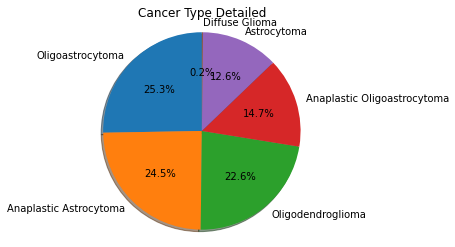

In [24]:
cancer_type = ['Oligoastrocytoma','Anaplastic Astrocytoma', 'Oligodendroglioma', 'Anaplastic Oligoastrocytoma', 'Astrocytoma', 'Diffuse Glioma']
occurrence  = [134, 130, 120, 78, 67, 1]

fig1, ax1 = plt.subplots()
ax1.pie(occurrence, labels=cancer_type, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Cancer Type Detailed')
plt.show()

In [25]:
new_unified_meta_cancer = new_unified_meta['GRADE'].value_counts()
print(new_unified_meta_cancer)

G3               270
G2               258
[Discrepancy]      1
Name: GRADE, dtype: int64


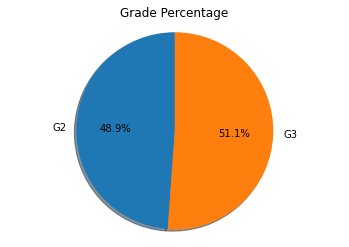

In [26]:
grade = ['G2','G3']
grade_people = [258,270]

fig1, ax1 = plt.subplots()
ax1.pie(grade_people, labels=grade, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.title('Grade Percentage')
plt.show()

In [27]:
new_unified_meta_cancer = new_unified_meta['DFS_STATUS'].value_counts()
print(new_unified_meta_cancer)

DiseaseFree            313
Recurred/Progressed    179
[Not Available]         37
Name: DFS_STATUS, dtype: int64


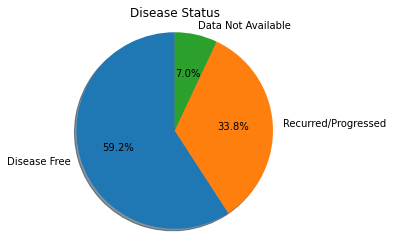

In [28]:
sickness_progression = ['Disease Free','Recurred/Progressed','Data Not Available']
sickness_number = [313,179,37]

fig1, ax1 = plt.subplots()
ax1.pie(sickness_number, labels=sickness_progression, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.title('Disease Status')
plt.show()

<AxesSubplot:xlabel='GRADE,DFS_STATUS'>

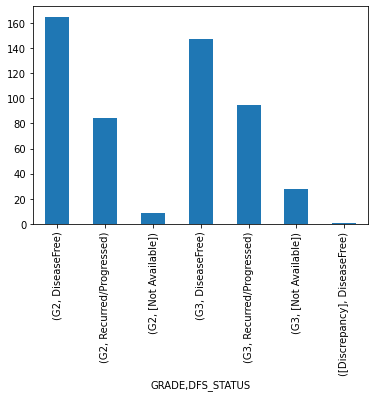

In [34]:
new_unified_meta.groupby(['GRADE','DFS_STATUS']).size().plot.bar()

# Secção 2 - Técnicas de análise inferencial / estatísitca

PCA - Redução de dimensionalidade dos dados, construindo combinações lineares de expressões de genes; Determinação de quantos componentes principais são necessários para explicar 90% da variabilidade dos dados.

Cada PC é gerada de forma a explicar o máximo de variabilidade da parte ainda não explicada, tendo que ser ortogonal às PCs anteriores.

[9.82088911 8.33711743 7.85329821 4.57784691 3.381319   2.82189852
 2.46820662 1.9542558  1.78662427 1.73062088 1.41739521 1.31937309
 1.02493945 1.00785073 0.91011692 0.8624892  0.78198907 0.76004857
 0.69228962 0.65161192 0.63642094 0.59146056 0.58698496 0.55090445
 0.53368185 0.50476536 0.45739891 0.44959058 0.43559165 0.42121233
 0.41738776 0.40252883 0.39155069 0.38739966 0.37709032 0.36935728
 0.36051011 0.35649747 0.3481237  0.34666956 0.34129984 0.33339336
 0.33205769 0.32788201 0.31901447 0.31196913 0.3061195  0.30064179
 0.29300883 0.29034465 0.28500671 0.2788535  0.27559318 0.27302036
 0.2721342  0.2694289  0.25875549 0.25497235 0.2495197  0.24660393
 0.23915637 0.23423618 0.23271264 0.22869168 0.2266113  0.22505597
 0.22389426 0.22264707 0.2193249  0.21232827 0.21138964 0.2078234
 0.20617454 0.20283093 0.20093481 0.1989258  0.19643639 0.19375994
 0.19218968 0.18764713 0.18555641 0.18046758 0.17840236 0.17523989
 0.1731866  0.17261764 0.16941248 0.16816843 0.1655498  0.16362

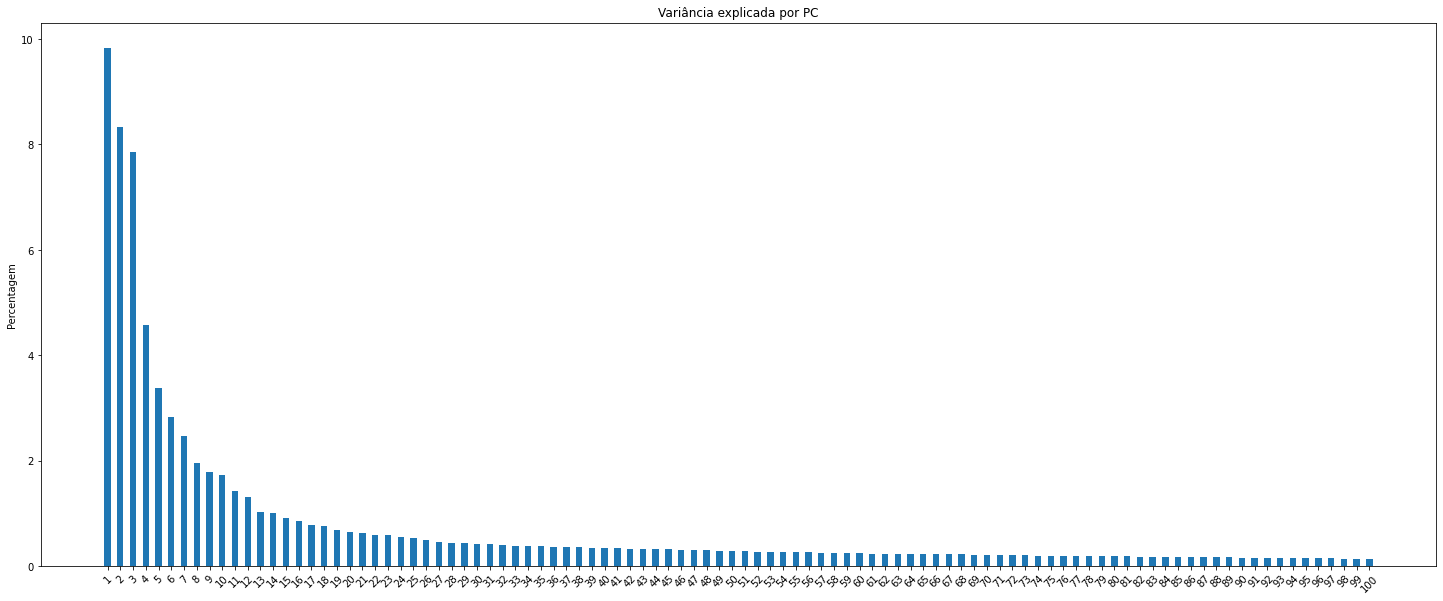

In [93]:
new_data = new_data_glioma.transpose()           
data_scale = preprocessing.scale(new_data)

n         = 100                                                              #tem-se 530 samples                                                     
pca       = PCA(n_components = n) 
x_reduced = pca.fit(data_scale).transform(data_scale)                                                                                                # escala

variance = (pca.explained_variance_ratio_*100)
print(variance)

labels = ["" + str(i) for i in range(1,len(variance) + 1)] 
plt.figure(figsize=(25, 10))
plt.bar([i*2 for i in range(1,len(variance) + 1)], height = variance, align="center", width=1)
plt.title("Variância explicada por PC")
plt.ylabel("Percentagem")
plt.xticks([i*2 for i in range(1,len(variance) + 1)], labels, rotation=45)
plt.show()

Clustering hierarquico dos dados. Agrupamento dos genes, iteração a iteração.

In [95]:
k=4
kmeans = KMeans(n_clusters=k, max_iter=1000)
kmeans.fit(data_scale)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

pd.crosstab(labels, new_unified_meta['GRADE'], rownames=['clusters'] )

GRADE,G2,G3,[Discrepancy]
clusters,,,
0,134,141,0
1,48,57,0
2,28,32,0
3,48,40,1


In [96]:
pd.crosstab(labels, new_unified_meta['DFS_STATUS'], rownames=['clusters'] )

DFS_STATUS,DiseaseFree,Recurred/Progressed,[Not Available]
clusters,,,
0,160,92,23
1,56,42,7
2,42,14,4
3,55,31,3


In [97]:
pd.crosstab(labels, new_unified_meta['CANCER_TYPE_DETAILED'], rownames=['clusters'] )

CANCER_TYPE_DETAILED,Anaplastic Astrocytoma,Anaplastic Oligoastrocytoma,Astrocytoma,Diffuse Glioma,Oligoastrocytoma,Oligodendroglioma
clusters,,,,,,
0,60,44,31,0,74,66
1,32,14,17,0,20,22
2,16,10,8,1,14,12
3,22,10,11,0,26,20


# Secção 3 - Aprendizagem de máquina